In [1]:
import pandas as pd

In [2]:
# load dataset

train = pd.read_csv("../data/raw_data/train.csv")
test = pd.read_csv("../data/raw_data/test.csv")
store = pd.read_csv("../data/raw_data/store.csv")

/var/folders/4y/jgs7sbvs2n92vmw0q53pv0580000gn/T/ipykernel_69701/1483805942.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("../data/raw_data/train.csv")


In [3]:
# display basic info of dataset

print("Train Shape", train.shape)
print("Test Shape", test.shape)
print("Store Shape", store.shape)

Train Shape (1017209, 9)
Test Shape (41088, 8)
Store Shape (1115, 10)


In [4]:
# display datatype stored in train dataset

train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [5]:
# display datatype stored in test dataset

test.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [6]:
# display datatype stored in store dataset

store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [7]:
# checking which column have mix data in train dataset

def check_mixed_types(df):
    mixed_cols = []
    for col in df.columns:
        types = df[col].dropna().apply(type).unique()
        if len(types) > 1:
            mixed_cols.append(col)
    return mixed_cols

check_mixed_types(train)

['StateHoliday']

In [8]:
# checking which datatype and how many where there

train["StateHoliday"].dropna().apply(type).value_counts()

StateHoliday
<class 'str'>    886137
<class 'int'>    131072
Name: count, dtype: int64

In [9]:
# Missing value percentage for train each column

missing_percent = (train.isnull().mean() * 100).round(2)
missing_percent

Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64

In [10]:
# Missing value percentage for test each column
missing_percent = (test.isnull().mean() * 100).round(2)
missing_percent


Id               0.00
Store            0.00
DayOfWeek        0.00
Date             0.00
Open             0.03
Promo            0.00
StateHoliday     0.00
SchoolHoliday    0.00
dtype: float64

In [11]:
# Missing value percentage for store each column

missing_percent = (store.isnull().mean() * 100).round(2)
missing_percent


Store                         0.00
StoreType                     0.00
Assortment                    0.00
CompetitionDistance           0.27
CompetitionOpenSinceMonth    31.75
CompetitionOpenSinceYear     31.75
Promo2                        0.00
Promo2SinceWeek              48.79
Promo2SinceYear              48.79
PromoInterval                48.79
dtype: float64

In [12]:
train.duplicated().sum()

np.int64(0)

In [13]:
test.duplicated().sum()

np.int64(0)

In [14]:
store.duplicated().sum()

np.int64(0)

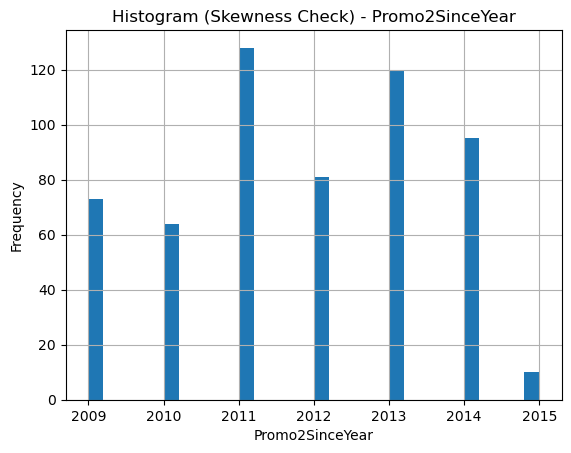

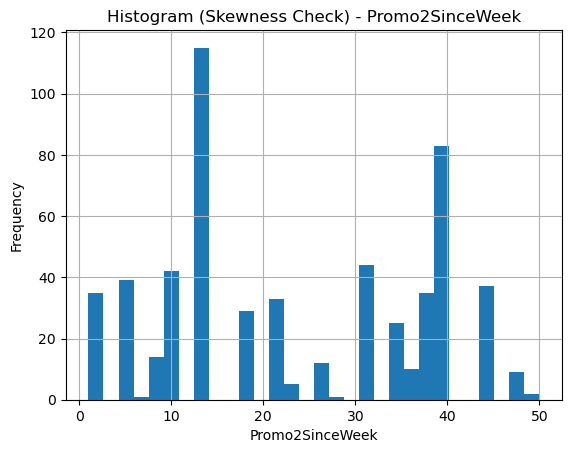

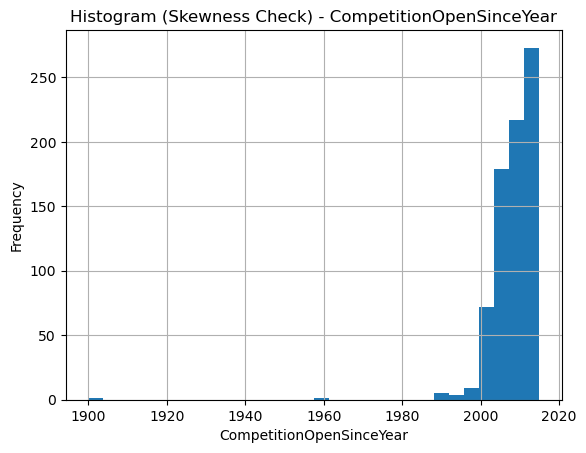

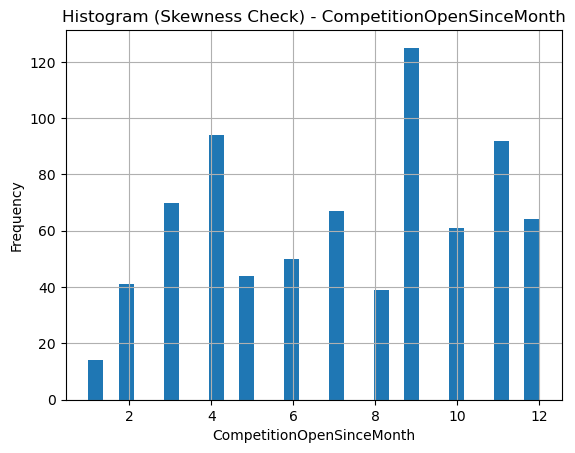

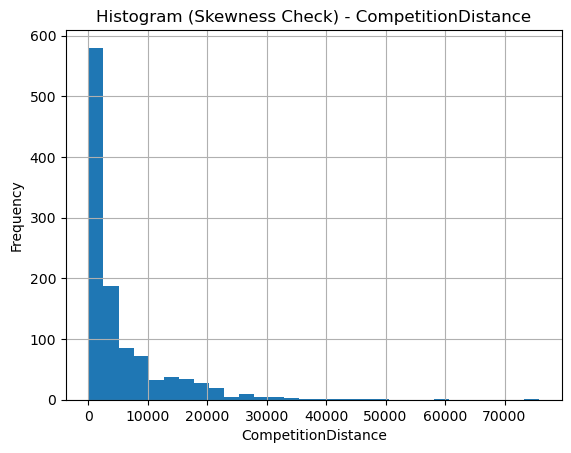

In [15]:
import matplotlib.pyplot as plt

skew_cols = [
    "Promo2SinceYear",
    "Promo2SinceWeek",
    "CompetitionOpenSinceYear",
    "CompetitionOpenSinceMonth",
    "CompetitionDistance"
]

for col in skew_cols:
    plt.figure()
    store[col].dropna().hist(bins=30)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram (Skewness Check) - {col}")
    plt.show()

In [28]:
# 1. Competition distance (numeric, skewed)
store["CompetitionDistance"] = store["CompetitionDistance"].fillna(
    store["CompetitionDistance"].median()
)

# 2. Competition open date (missing = no competitor)
store["CompetitionOpenSinceMonth"] = store["CompetitionOpenSinceMonth"].fillna(0)
store["CompetitionOpenSinceYear"] = store["CompetitionOpenSinceYear"].fillna(0)

# 3. Promo2-related columns (missing = Promo2 never started)
store["Promo2SinceWeek"] = store["Promo2SinceWeek"].fillna(0)
store["Promo2SinceYear"] = store["Promo2SinceYear"].fillna(0)
store["PromoInterval"] = store["PromoInterval"].fillna("None")

# 4. Fix datatype for categorical column
store["PromoInterval"] = store["PromoInterval"].astype("category")

In [17]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [18]:
# merge store and train data

train_merged = train.merge(store, on="Store", how="left")
print("Merged train shape:", train_merged.shape)

Merged train shape: (1017209, 18)


In [19]:
# merge store and test data

test_merged = test.merge(store, on = "Store", how = "left")
print("Merged test shape", test_merged.shape)

Merged test shape (41088, 17)


In [20]:
# checking null value in merge data

train_merged.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [26]:
train_merged.duplicated().sum()

np.int64(0)

In [27]:
test_merged.duplicated().sum()

np.int64(0)

In [21]:
# handel missing value in test_merged 

test_merged["Open"] = test_merged["Open"].fillna(1)

In [22]:
test_merged.isnull().sum()

Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [23]:
train_merged.dtypes

Store                           int64
DayOfWeek                       int64
Date                           object
Sales                           int64
Customers                       int64
Open                            int64
Promo                           int64
StateHoliday                   object
SchoolHoliday                   int64
StoreType                      object
Assortment                     object
CompetitionDistance           float64
CompetitionOpenSinceMonth     float64
CompetitionOpenSinceYear      float64
Promo2                          int64
Promo2SinceWeek               float64
Promo2SinceYear               float64
PromoInterval                category
dtype: object

In [24]:
test_merged.dtypes

Id                              int64
Store                           int64
DayOfWeek                       int64
Date                           object
Open                          float64
Promo                           int64
StateHoliday                   object
SchoolHoliday                   int64
StoreType                      object
Assortment                     object
CompetitionDistance           float64
CompetitionOpenSinceMonth     float64
CompetitionOpenSinceYear      float64
Promo2                          int64
Promo2SinceWeek               float64
Promo2SinceYear               float64
PromoInterval                category
dtype: object

In [25]:
# saving merge data 

train_merged.to_csv("../data/processed_data/train_merged.csv", index=False)
test_merged.to_csv("../data/processed_data/test_merged.csv", index=False)